# Logistic Regression using Gradient Descent Optimizer

### Step1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import math 
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv('irisdata.csv',header=None,names=('Sepal L','Sepal W','Petal L','Petal W','Class'))

FileNotFoundError: [Errno 2] File b'irisdata.csv' does not exist: b'irisdata.csv'

In [ ]:
iris.head()

### Step 2. Label encoding the Class column

In [34]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
iris.Class = LE.fit_transform(iris.Class)

In [35]:
iris.head()

,Sepal L,Sepal W,Petal L,Petal W,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step3. Taking only first 100 rows

In [36]:
iris=iris.head(100)

### Step 4. Shuffling the DataFrame

In [37]:
# Generating 100 random & unique integers
shuffler = rn.sample(range(101),100)

# Adding it as a new column
iris['new_index'] = shuffler

# Resetting the index
iris.set_index('new_index',inplace=True)

# Finally Sorting the DataFrame according to the new index
iris.sort_index(inplace=True)

# Shuffled DataFrame:
iris.head()

,Sepal L,Sepal W,Petal L,Petal W,Class
new_index,,,,,
0,4.7,3.2,1.3,0.2,0
1,5.0,3.4,1.6,0.4,0
2,4.8,3.0,1.4,0.3,0
3,5.0,3.3,1.4,0.2,0
4,5.9,3.2,4.8,1.8,1


### Step 5. Splitting 70-30 for Train-Test Data

In [38]:
# First 70 Data points for Training
iris_train = iris.iloc[:70,:]

#Last 30 for Testing
iris_test = iris.iloc[70:,:]

#### Data is ready for applying the Gradient Descent optimizer. Next step will be to apply GD to find the optimum values for the weights with the least loss. As there are 4 parameters affecting the class, the equation used is :

  ##### Y = W0 + W1*X1 + W2*X2 + W3*X3 + W4*X4
                          
#### To make it suitable for Logistic regression, sigmoid function will be used to keep its values in range 0 to 1.

### Step 6. Applying Gradient Descent to find the optimum weights


 Final MSE:  -0.4428571428560064


C:\Users\Chayan Kathuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


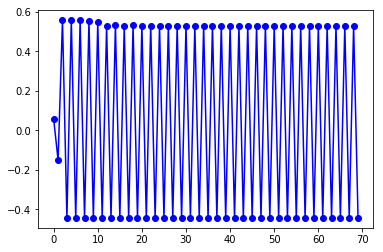

In [39]:
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0

# Alpha
a = 0.02

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z

for epoch in range(len(iris_train)):
    
    p_pred = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    
    # Iterating through the Df and calculating all parameters:
    for row in iris_train.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4]
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)   
        
        # Bifurcating the predicted class as per its probability to be the default class
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1)
        else:
            p_class = np.append(p_class,0)
            
    # The error in prediction
    error = np.append(error,p_pred_exp - iris_train['Class'])
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = np.append(error_x1, error*iris_train['Sepal L'])
    error_x2 = np.append(error_x2, error*iris_train['Sepal W'])
    error_x3 = np.append(error_x3, error*iris_train['Petal L'])
    error_x4 = np.append(error_x4, error*iris_train['Petal W'])
    
    # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)

# Adding the predicted class as a separate column to check for performance:
iris_train['pred_class']=p_class

print('\n Final MSE: ',MSE_val)

plt.plot(MSE,'b-o')

#### Checking the predicted Values with actual values:

In [48]:
iris_train.head(20)

,Sepal L,Sepal W,Petal L,Petal W,Class,pred_class
new_index,,,,,,
0,4.7,3.2,1.3,0.2,0,0.0
1,5.0,3.4,1.6,0.4,0,0.0
2,4.8,3.0,1.4,0.3,0,0.0
3,5.0,3.3,1.4,0.2,0,0.0
4,5.9,3.2,4.8,1.8,1,1.0
5,5.0,2.3,3.3,1.0,1,1.0
6,4.3,3.0,1.1,0.1,0,0.0
7,5.1,3.4,1.5,0.2,0,0.0
8,5.5,2.5,4.0,1.3,1,1.0


#### Checking if it missed any point in the training set:

In [43]:
iris_train.pred_class.astype('int64')
iris_train[iris_train.pred_class != iris_train.Class]

,Sepal L,Sepal W,Petal L,Petal W,Class,pred_class
new_index,,,,,,


#### No, so the algorithm has given the optimum weights:

In [46]:
print(W0_new,W1_new,W2_new,W3_new,W4_new)

-4.172026572070333 0.05045708022171169 -28.60512252525842 56.35144833133028 22.775701285670465


### Step7. Finally, Applying the weights to the test data

In [50]:
# Using the optimum values of weights from the last epoch of training
Wt = W0_new
W1_t = W1_new
W2_t = W2_new
W3_t = W3_new
W4_t = W4_new
p_class_test = np.array([])

for row in iris_test.itertuples():
    p_pred = Wt + W1_t*row[1]+ W2_t*row[2] + W3_t*row[3] + W4_t*row[4]
    p_pred_exp = sigmoid(p_pred)   #predicted value
        
    if p_pred_exp > 0.5:
        p_class_test = np.append(p_class_test,1)
    else:
        p_class_test = np.append(p_class_test,0)

In [53]:
error_test = np.array([])
error_test = np.append(error_test,p_pred_exp - iris_test['Class'])
MSE = (error**2).mean()
print('MSE: ', MSE)

MSE:  0.44285714285613625


#### Checking predicted classes against actual

In [54]:
iris_test['Pred_class'] = p_class_test

C:\Users\Chayan Kathuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
iris_test

,Sepal L,Sepal W,Petal L,Petal W,Class,Pred_class
new_index,,,,,,
71,5.4,3.7,1.5,0.2,0,0.0
72,5.1,2.5,3.0,1.1,1,1.0
73,6.7,3.1,4.4,1.4,1,1.0
74,6.3,2.3,4.4,1.3,1,1.0
75,5.7,2.8,4.1,1.3,1,1.0
76,6.9,3.1,4.9,1.5,1,1.0
77,6.2,2.9,4.3,1.3,1,1.0
78,5.2,3.4,1.4,0.2,0,0.0
79,4.9,3.0,1.4,0.2,0,0.0


#### Checking for missed values

In [59]:
iris_test.Pred_class.astype('int64')
iris_test[iris_test.Pred_class != iris_test.Class]

,Sepal L,Sepal W,Petal L,Petal W,Class,Pred_class
new_index,,,,,,
89,5.0,3.0,1.6,0.2,0,1.0


### Just the one !